In [1]:
from google.colab import files
uploaded = files.upload()


Saving Cleaned_Smart_Todo.csv to Cleaned_Smart_Todo.csv


,description,Category,Skill,cleaned_text,priority
0,Implement user authentication,backend,spring boot,implement user authentication,High
1,Optimize server performance,backend,asp.net,optimize server performance,Medium
2,Manage database operations,backend,django,manage database operations,Medium
3,Implement user authentication,backend,api,implement user authentication,High
4,Build a microservice,backend,kotlin,build microservice,High


In [2]:
# Load Cleaned Data
import pandas as pd

df = pd.read_csv("Cleaned_Smart_Todo.csv")

# Check if 'priority' exists
if 'priority' not in df.columns:
    import numpy as np
    df['priority'] = np.random.choice(['Low', 'Medium', 'High'], size=len(df))

df.head()


,description,Category,Skill,cleaned_text,priority
0,Implement user authentication,backend,spring boot,implement user authentication,Medium
1,Optimize server performance,backend,asp.net,optimize server performance,Medium
2,Manage database operations,backend,django,manage database operations,Medium
3,Implement user authentication,backend,api,implement user authentication,Medium
4,Build a microservice,backend,kotlin,build microservice,Medium


In [3]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df['cleaned_text'])

y = df['priority']


In [4]:
# Train / Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [13]:
# Evaluation
from sklearn.metrics import classification_report

print("🔍 Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

print("🔍 XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))


🔍 Random Forest Results:
              precision    recall  f1-score   support

           0       0.32      0.25      0.28      1366
           1       0.32      0.37      0.34      1320
           2       0.35      0.38      0.36      1339

    accuracy                           0.33      4025
   macro avg       0.33      0.33      0.33      4025
weighted avg       0.33      0.33      0.33      4025

🔍 XGBoost Results:
              precision    recall  f1-score   support

           0       0.32      0.24      0.27      1366
           1       0.32      0.35      0.34      1320
           2       0.34      0.39      0.36      1339

    accuracy                           0.33      4025
   macro avg       0.33      0.33      0.32      4025
weighted avg       0.33      0.33      0.32      4025



In [14]:
# Hyperparameter Tuning (Random Forest Example)
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_rf = grid.best_estimator_


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [15]:
# Save Best Models
import joblib

joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [17]:
# Downloading best models
from google.colab import files

files.download('random_forest_model.pkl')
files.download('xgboost_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

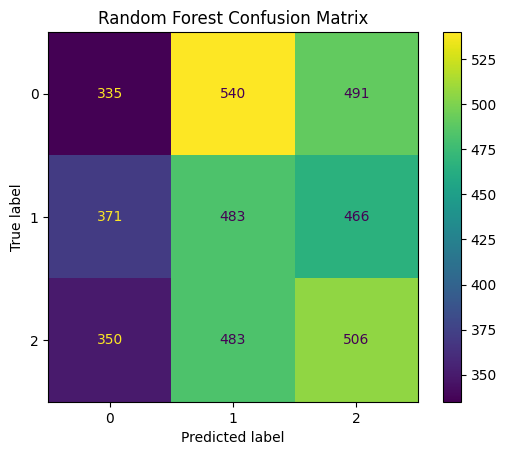

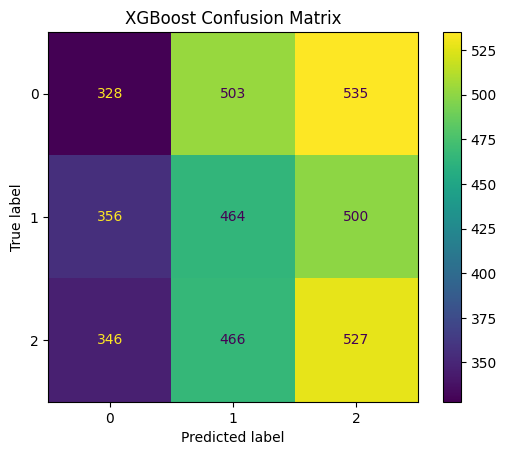

In [18]:
# Visualize Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("XGBoost Confusion Matrix")
plt.show()
